In [5]:
!pip install basemap

In [6]:
import xarray as xr

data = xr.open_dataset('/content/combined.nc')
variable_names = list(data.variables)
print(variable_names)

['MOD08_D3_6_1_Cloud_Optical_Thickness_Combined_Mean', 'lat', 'lat_bnds', 'lon', 'lon_bnds']


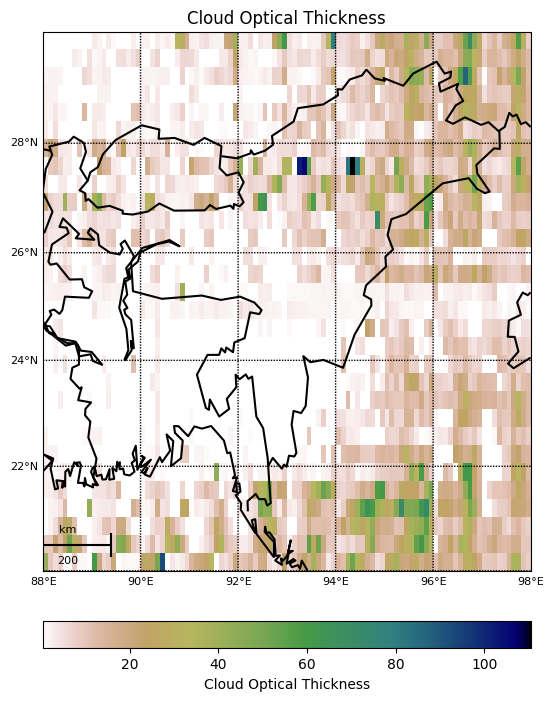

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = xr.open_dataset('/content/combined.nc')

variable = data['MOD08_D3_6_1_Cloud_Optical_Thickness_Combined_Mean']
variable_2d = variable.values.reshape(variable.shape[0], variable.shape[1] * variable.shape[2])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlon=88, llcrnrlat=20, urcrnrlon=98, urcrnrlat=30, resolution='l')
im = m.imshow(variable_2d, cmap='gist_earth_r')

m.drawcoastlines(linewidth=1.5)
m.drawcountries(linewidth=1.5)
m.drawmapscale(88.5, 20.5, 88, 20, 200, barstyle='simple', units='km', fontsize=8)
m.drawparallels(range(20, 31, 2), labels=[1, 0, 0, 0], fontsize=8)
m.drawmeridians(range(88, 99, 2), labels=[0, 0, 0, 1], fontsize=8)

cbar = m.colorbar(im, location='bottom', pad=0.5, cmap='cividis')
cbar.set_label('Cloud Optical Thickness')

ax.set_title('Cloud Optical Thickness')

plt.show()